In [5]:
# Premiers exercices
print("Analyse boursière")

Analyse boursière


Let's go learning Python

In [ ]:
# Ceci est un commentaire dans la cellule de code
# Python est une programmation orientée objet. On définit des variables

name = "Ajla"
print(name)
name

Ajla


'Ajla'

In [9]:
# Pour les chiffres on a :

age = 26 #integer (nombres entiers)
print(age)

pi = 3.14159 #float
pi

26


3.14159

In [14]:
# Dictionnaire = couple clé-valeur (= plusieurs variables ensemble)

prices = {
    "AAPL" :248.04,
    "GOOGLE" :328.33,
    "TSLA" :437.43
    }

prices

{'AAPL': 248.04, 'GOOGLE': 328.33, 'TSLA': 437.43}

# Comment avoir les données boursières ?

In [20]:
# On utilise des packages

! pip install yfinance
! pip install matplotlib


[notice] A new release of pip is available: 25.3 -> 26.0
[notice] To update, run: python3 -m pip install --upgrade pip
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 61.4 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 72.8 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 59.7 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 79.7 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7/7 [matplotlib]7 [matplotlib]

[notice] A new release of pip is available: 25.3 -> 26.0
[notice] To update, run: python3 -m pip install --upgrade pip


In [5]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# La structure d'un projet python : 
# Une cellule ou l'on importe tous les packages
# comme ça on a une overview des dépendances

In [11]:
ticker = "AAPL"

# Pour prendre les données du package yfinance, on utilise une fonction qui est def dans ce package pour extraire la donnée.
data = yf.download(ticker,start="2020-01-01", progress=False, auto_adjust=False)

data

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,
2020-01-02,72.468269,75.087502,75.150002,73.797501,74.059998,135480400
2020-01-03,71.763741,74.357498,75.144997,74.125000,74.287498,146322800
2020-01-06,72.335556,74.949997,74.989998,73.187500,73.447502,118387200
2020-01-07,71.995361,74.597504,75.224998,74.370003,74.959999,108872000
2020-01-08,73.153503,75.797501,76.110001,74.290001,74.290001,132079200
...,...,...,...,...,...,...
2026-01-26,255.410004,255.410004,256.559998,249.800003,251.479996,55969200
2026-01-27,258.269989,258.269989,261.950012,258.209991,259.170013,49648300


In [29]:
data.head() # Fonction pour voir les 5 premières lignes du dataset
data.tail() # Fonction pour voir les 5 dernières lignes du dataset

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2026-01-26,255.410004,256.559998,249.800003,251.479996,55969200
2026-01-27,258.269989,261.950012,258.209991,259.170013,49648300
2026-01-28,256.440002,258.859985,254.509995,257.649994,41288000
2026-01-29,258.279999,259.649994,254.410004,258.000000,67253000
2026-01-30,259.480011,261.899994,252.179993,255.169998,92352600


Portfolio optimization

Optimize asset allocation
Balance risk-return tradeoffs
Implement modern portfolio theory

package pypfopt 

Performance analysis

Return attribution analysis
Risk-adjusted performance metrics
Benchmark comparison

Data Management

Data quality 

Implement robust data validation procedures
Handle missing values appropriately
Document data sources & transformations

Processing pipeline 

Create reproducible analysis workflows
Maintain version control of datasets
Immplement automated data quality checks

Model implementation

Validation & documentation

Machine Learning


Problématique : prédiction du cours de l'or / prédiction du cours d'Apple


Financial Specific : yfinance, pypfopt, empyrical, risk-kit
Advanced Analytics : scikit-learn, tensorflow, prophet, arch, aladdin



In [25]:
#2. calculer les rendements journaliers (daily returns)
data['Returns']=data['Adj Close'].pct_change()

# 3. Calculer la volatilité et le rendement moyen (annualisés)
# Il y a environ 252 jours de trading par an

mean_return_daily = data['Returns'].mean()
volatility_daily = data['Returns'].std()

annualized_return = mean_return_daily * 252
annualizized_volatility = volatility_daily * np.sqrt(252)

Sharpe_ratio = annualized_return / annualizized_volatility

print(f"--- Analyse pour {ticker} ---")
print(f"Rendement annualisé : {annualized_return:.2%}")
print(f"Volatilité annualisée : {annualizized_volatility:.2%}")
print(f"Ratio de Sharpe : {Sharpe_ratio:.2f}")

--- Analyse pour AAPL ---
Rendement annualisé : 26.06%
Volatilité annualisée : 31.69%
Ratio de Sharpe : 0.82


Text(0.5, 0, 'Date')

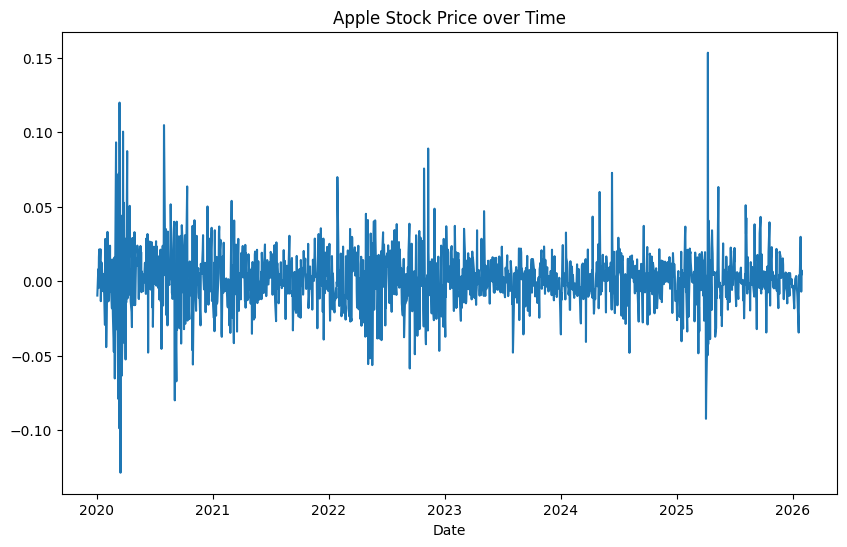

In [26]:
plt.figure(figsize=(10,6))
plt.plot(data['Returns'],label='AAPL Closing Price')
plt.title('Apple Stock Price over Time')
plt.xlabel('Date')

Donner problématique 
Exploratory data analysis
Data source (extraction des données)
Expliquer d'ou viennent les données
Expliquer les notoyages (drop.na, replace by mean, ...)
plot (bar shart ...) pour visualiser le dataset, ne pas hésiter à cumuler les data set
Cahier des charges
Réalisation Machine learning (OLS, logit probit ... ) 
Interprétation
Conclusion